# CNN Sınıflandırma – Model 3 (Geliştirilmiş CNN)

**Ad:** Yusuf  
**Soyad:** TUNÇ  
**Okul No:** 2012721024  
**GitHub Repo Bağlantısı:** https://github.com/ytunc4141/CNN_siniflandirma  

Bu modelde, Model2 üzerine geliştirmeler yapılarak daha iyi performans elde edilmesi amaçlanmıştır.  
Model, sıfırdan tanımlanmış bir CNN mimarisi kullanılarak eğitilmiştir.

Model3 kapsamında:
- CNN mimarisi üzerinde değişiklikler yapılmıştır,
- Farklı hiperparametreler denenmiştir,
- Veri artırımı (data augmentation) uygulanmıştır.

Amaç, Model2’ye göre doğruluk oranını artırmak ve yapılan değişikliklerin modele etkisini gözlemlemektir.


## Gerekli Kütüphanelerin Yüklenmesi

Bu bölümde modelin kurulması, eğitilmesi ve değerlendirilmesi için gerekli olan `TensorFlow`, `Keras`, `NumPy` ve `Matplotlib` kütüphaneleri içe aktarılmıştır.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

## Google Drive Bağlantısı

Veri seti ve model çıktıları Google Drive üzerinde tutulduğu için Drive bağlantısı yapılmıştır.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Veri Seti ve Model Parametreleri

Bu bölümde veri setinin bulunduğu klasör yolu tanımlanmış, görüntü boyutu, batch size ve epoch sayısı gibi temel eğitim parametreleri belirlenmiştir.


In [3]:
DATASET_PATH = "/content/drive/MyDrive/Colab_Notebooks/CNN_Siniflandirma/dataset"

In [4]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 64
EPOCHS = 20

### Veri Ön İşleme (ImageDataGenerator) ve Eğitim ve Doğrulama Verilerinin Oluşturulması

Bu hücrede görüntüler modele verilmeden önce normalize edilmiştir.
Ayrıca `validation_split` parametresi kullanılarak veri seti
eğitim (%80) ve doğrulama (%20) olarak ikiye ayrılmıştır.

Bu bölümde eğitim ve doğrulama verileri,
`ImageDataGenerator` ve `flow_from_directory` fonksiyonları kullanılarak
diskten okunmuş ve modele uygun hale getirilmiştir.

### Model2’ye Göre Yapılan Değişiklikler

Model3’te, Model2’den farklı olarak online veri artırımı (data augmentation) eklenmiştir.  
Bu kapsamda eğitim sırasında görüntülere:

- Döndürme (rotation)
- Yatay kaydırma (width shift)
- Yatay çevirme (horizontal flip)

işlemleri uygulanmıştır.

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 119 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


### Geliştirilmiş CNN Modeli

Bu hücrede, Model 2’de kullanılan temel CNN mimarisi üzerinde bazı değişiklikler yapılmıştır.

Model 2’den farklı olarak:
- Konvolüsyon katmanlarındaki filtre sayıları artırılmıştır (32 → 64, 128 → 256).
- Son MaxPooling katmanında havuzlama boyutu büyütülmüştür((2,2) → (3,3)).
- Aşırı öğrenmeyi azaltmak için `Dropout (0.4)` katmanı eklenmiştir.


In [10]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((3,3)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

## Modelin Derlenmesi

Model, `categorical_crossentropy` kayıp fonksiyonu ve `Adam` optimizasyon algoritması kullanılarak derlenmiştir.
Performans metriği olarak doğruluk `(accuracy)` seçilmiştir.


In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,025,410 (11.54 MB)

 Trainable params: 3,025,410 (11.54 MB)

 Non-trainable params: 0 (0.00 B)

## Callback Yapıları

Eğitim sırasında en iyi doğrulama doğruluğuna sahip modelin kaydedilmesi için `ModelCheckpoint` kullanılmıştır.


In [12]:
checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive/Colab_Notebooks/CNN_Siniflandirma/best_model_model3.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

## Modelin Eğitilmesi

Bu hücrede model, eğitim verileri üzerinde eğitilmiş ve doğrulama verileri ile performansı takip edilmiştir.


In [13]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[checkpoint]
)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4432 - loss: 0.6785 
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to /content/drive/MyDrive/Colab_Notebooks/CNN_Siniflandirma/best_model_model3.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 19s/step - accuracy: 0.4607 - loss: 0.6730 - val_accuracy: 0.7500 - val_loss: 0.5217
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.8192 - loss: 0.4636
Epoch 2: val_accuracy improved from 0.75000 to 1.00000, saving model to /content/drive/MyDrive/Colab_Notebooks/CNN_Siniflandirma/best_model_model3.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.8318 - loss: 0.4531 - val_accuracy: 1.0000 - val_loss: 0.1162
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9315 - loss: 0.2195
Epoch 3: val_accuracy did not improve from 1.00000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 705ms/step - accuracy: 0.9347 - loss: 0.2100 - val_accuracy: 1.0000 - val_loss: 0.0639
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 1.0000 - loss: 0.1090
Epoch 4: val_accuracy did not improve from 1.00000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step - accuracy: 1.0000 - loss: 0.1034 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 1.0000 - loss: 0.0175
Epoch 5: val_accuracy did not improve from 1.00000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step - accuracy: 1.0000 - loss: 0.0171 - val_accuracy: 1.0000 - val_loss: 3.8257e-04
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.9958 - loss: 0.0074
Epoch 6: val_accuracy did not improve from 1.00000

### Eğitim ve Doğrulama Doğruluk / Kayıp Grafikleri

Bu bölümde modelin eğitim süreci boyunca elde ettiği
eğitim ve doğrulama doğruluk `(accuracy)` ile kayıp `(loss)`
değerleri görselleştirilmiştir.

Grafikler sayesinde:
- Modelin öğrenme süreci,
- Aşırı öğrenme `(overfitting)` olup olmadığı,
- Eğitim ve doğrulama performansları arasındaki fark

incelenebilmektedir.


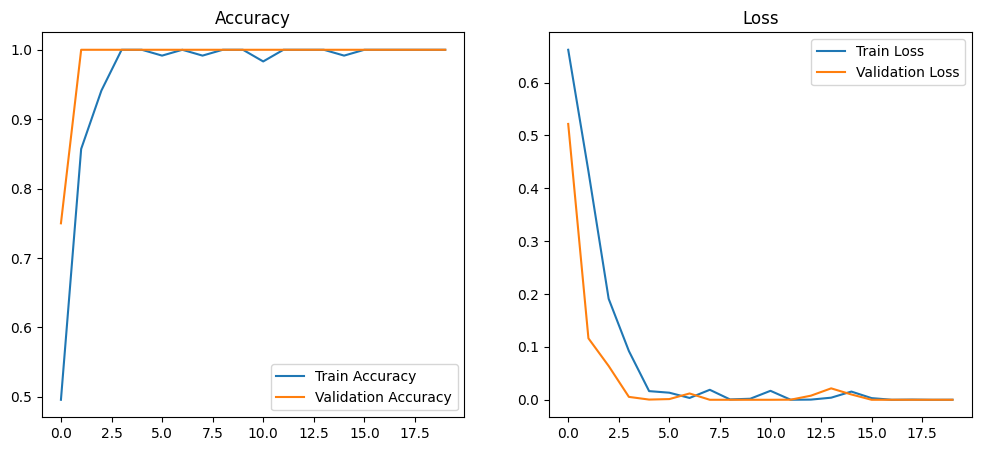

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

### Modelin Doğrulama Verisi Üzerinde Değerlendirilmesi

Bu hücrede eğitilmiş model, doğrulama `(validation)` verisi üzerinde değerlendirilmiştir.  
Modelin doğruluk `(accuracy)` değeri hesaplanarak performansı ölçülmüştür.


In [15]:
test_loss, test_acc = model.evaluate(val_generator)
print(f"Test Accuracy: %{test_acc*100:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 1.0000 - loss: 1.6604e-07
Test Accuracy: %100.00


## En İyi Modelin Yüklenmesi

Eğitim sırasında kaydedilen en iyi model yüklenerek test verisi üzerinde değerlendirme yapılmıştır.


In [16]:
best_model = load_model(
    "/content/drive/MyDrive/Colab_Notebooks/CNN_Siniflandirma/best_model_model3.h5"
)
loss, acc = best_model.evaluate(val_generator)
print(f"Test Accuracy: %{acc*100:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step - accuracy: 1.0000 - loss: 0.1195
Test Accuracy: %100.00


## Tek Görüntü Üzerinde Tahmin

Bu bölümde eğitilmiş model kullanılarak tek bir trafik levhası görüntüsü üzerinde sınıf tahmini yapılmıştır.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


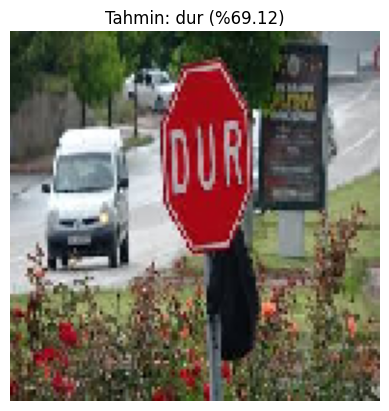

In [18]:
class_labels = {v: k for k, v in train_generator.class_indices.items()}

img_path = "/content/drive/MyDrive/Colab_Notebooks/CNN_Siniflandirma/test/1.jpg"

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = best_model.predict(img_array)
class_index = np.argmax(prediction)
predicted_class = class_labels[class_index]
confidence = np.max(prediction) * 100

plt.imshow(img)
plt.axis("off")
plt.title(f"Tahmin: {predicted_class} (%{confidence:.2f})")
plt.show()